In [3]:
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
ds = xr.open_dataset("../data/production/OCO2_005deg_monthly_north_america_with_basis.nc4")
ds


<xarray.Dataset>
Dimensions:   (lat: 720, lon: 1200, time: 90)
Coordinates:
  * lat       (lat) float64 22.02 22.07 22.12 22.17 ... 57.82 57.87 57.92 57.97
  * lon       (lon) float64 -125.0 -124.9 -124.9 -124.8 ... -65.12 -65.07 -65.02
  * time      (time) datetime64[ns] 2014-09-01 2014-10-01 ... 2022-02-01
Data variables: (12/64)
    sif       (lat, lon, time) float32 ...
    sif_var   (lat, lon, time) float32 ...
    xco2      (lat, lon, time) float32 ...
    xco2_var  (lat, lon, time) float32 ...
    B1        (lat, lon) float64 ...
    B2        (lat, lon) float64 ...
    ...        ...
    B55       (lat, lon) float64 ...
    B56       (lat, lon) float64 ...
    B57       (lat, lon) float64 ...
    B58       (lat, lon) float64 ...
    B59       (lat, lon) float64 ...
    B60       (lat, lon) float64 ...

In [5]:
df = ds[["sif", "xco2"]].mean(dim=["lat", "lon"]).to_dataframe().reset_index()
df


,time,sif,xco2
0,2014-09-01,0.711334,394.641602
1,2014-10-01,0.408798,395.627380
2,2014-11-01,0.213454,397.574402
3,2014-12-01,0.193133,398.889587
4,2015-01-01,0.179840,399.640320
...,...,...,...
85,2021-10-01,0.374449,413.783691
86,2021-11-01,0.250536,415.340332
87,2021-12-01,0.209989,416.427795
88,2022-01-01,0.175825,417.723450


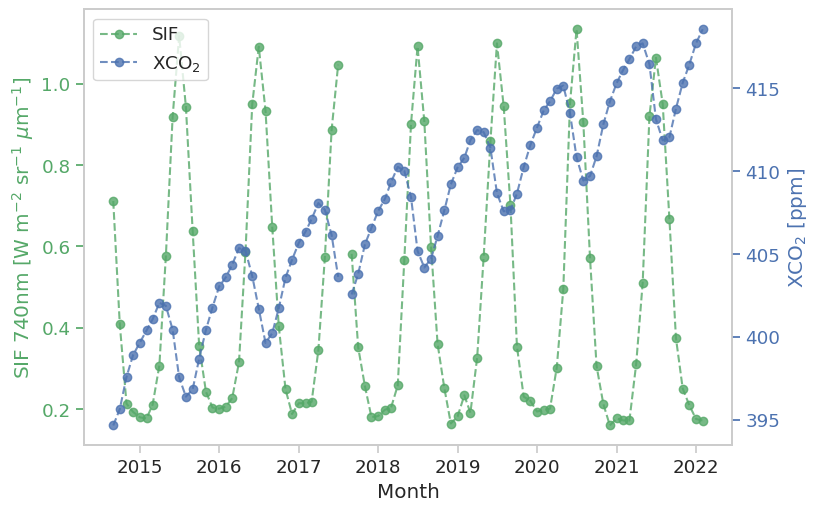

In [6]:
XCO2_COLOR = "#4C72B0"
SIF_COLOR = "#55A868"
BORDER_COLOR = ".8"  # seaborn's "lightgray" used in "whitegrid"
ALPHA = 0.8
MARK = "o"
LINESTYLE = "dashed"
sns.set_theme(
    context="notebook", style="ticks", font_scale=1.2, rc={"axes.edgecolor": BORDER_COLOR}
)

fig, ax = plt.subplots(figsize=(8, 5), constrained_layout=True)
ax_r1 = ax.twinx()

# Line plots
ax.plot(
    df["time"],
    df["sif"],
    marker=MARK,
    linestyle=LINESTYLE,
    color=SIF_COLOR,
    alpha=ALPHA,
    label="SIF",
)
ax_r1.plot(
    df["time"],
    df["xco2"],
    marker=MARK,
    linestyle=LINESTYLE,
    color=XCO2_COLOR,
    alpha=ALPHA,
    label="XCO$_2$",
)
ax.plot(
    [], [], marker=MARK, linestyle=LINESTYLE, color=XCO2_COLOR, alpha=ALPHA, label="XCO$_2$"
)

# Customize axes
ax.tick_params(axis="x", color=BORDER_COLOR)
ax.tick_params(axis="y", colors=SIF_COLOR)
ax_r1.tick_params(axis="y", colors=XCO2_COLOR)
ax.yaxis.label.set_color(SIF_COLOR)
ax_r1.yaxis.label.set_color(XCO2_COLOR)
ax.legend(loc="upper left")

# Add labels
ax.set_ylabel("SIF 740nm [W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$]")
ax_r1.set_ylabel("XCO$_2$ [ppm]")
ax.set_xlabel("Month")

fig.savefig("../figures/bivariate_time_series_north_america.pdf", dpi=300)
